In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [4]:
#!wget https://github.com/chloech2123/COMP-562-Final-Project/raw/main/heart.csv

In [5]:
df = pd.read_csv('https://github.com/chloech2123/COMP-562-Final-Project/raw/main/heart.csv')

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

##1 Getting the categorical columns

Categorical Features: 
'Sex', 'ChestPainType', 'HeartDisease', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'

Continous Features:
'Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR'

## 2.1 Column Statistics (of categorical data) and visualization

In [7]:
df_copy = df.copy()

df_copy.loc[df['Sex'] == 'F','Sex'] = 'Female'
df_copy.loc[df['Sex'] == 'M','Sex'] = 'Male'

df_copy.loc[df['ChestPainType'] == 'TA','ChestPainType'] = 'Typical Angina'
df_copy.loc[df['ChestPainType'] == 'ATA','ChestPainType'] = 'Atypical Angina'
df_copy.loc[df['ChestPainType'] == 'NAP','ChestPainType'] = 'Non-Anginal Pain'
df_copy.loc[df['ChestPainType'] == 'ASY','ChestPainType'] = 'Asymptomatic'

df_copy.loc[df['FastingBS'] == 1,'FastingBS'] = '> 120 mg/dl'
df_copy.loc[df['FastingBS'] == 0,'FastingBS'] = '≤ 120 mg/dl'

df_copy.loc[df['RestingECG'] == 'ST','RestingECG'] = 'ST-T wave abnormality'
df_copy.loc[df['RestingECG'] == 'LVH','RestingECG'] = 'Left ventricular hypertrophy'

df_copy.loc[df['ExerciseAngina'] == 'Y','ExerciseAngina'] = 'Yes'
df_copy.loc[df['ExerciseAngina'] == 'N','ExerciseAngina'] = 'No'

df_copy.loc[df['ST_Slope'] == 'Up','ST_Slope'] = 'Upsloping'
df_copy.loc[df['ST_Slope'] == 'Flat','ST_Slope'] = 'Flat'
df_copy.loc[df['ST_Slope'] == 'Down','ST_Slope'] = 'Downsloping'

df_copy.loc[df['HeartDisease'] == 0,'HeartDisease'] = 'Normal'
df_copy.loc[df['HeartDisease'] == 1,'HeartDisease'] = 'Heart disease'


In [8]:
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig = go.Figure(go.Pie(labels=np.array(df_copy['HeartDisease'].value_counts().index),
                     values=[x for x in df_copy['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours))
fig.show()

In [9]:
fig = make_subplots(
    rows=1, cols=3, subplot_titles=('Sex', 'Chest Pain Type','Fasting Blood Sugar'),
    specs=[
           [{"type": "domain"},{"type": "domain"},{"type": "domain"}]]
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df_copy['Sex'].value_counts().index),
                     values=[x for x in df_copy['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df_copy['ChestPainType'].value_counts().index),
                     values=[x for x in df_copy['ChestPainType'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df_copy['FastingBS'].value_counts().index),
                     values=[x for x in df_copy['FastingBS'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=3)


fig.update_layout(height=580, font=dict(size=12), showlegend=False)

fig.show()

In [10]:
fig = make_subplots(
    rows=1, cols=3, subplot_titles=('RestingECG', 'Exercise-induced Angina', 'ST_Slope'),
    specs=[
           [{"type": "domain"},{"type": "domain"},{"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df_copy['RestingECG'].value_counts().index),
                     values=[x for x in df_copy['RestingECG'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df_copy['ExerciseAngina'].value_counts().index),
                     values=[x for x in df_copy['ExerciseAngina'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df_copy['ST_Slope'].value_counts().index),
                     values=[x for x in df_copy['ST_Slope'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=3)

#fig.add_trace(go.Pie(labels=np.array(pt['race'].value_counts().index),values=[x for x in pt['race'].value_counts()], hole=.35,textinfo='label+percent', marker_colors=colours),row=1, col=2)


fig.update_layout(height=580, font=dict(size=11), showlegend=False)

fig.show()

# 2.2 Column Statistics (of numerical data) and Visualization

In [11]:
string_col=df.select_dtypes("object").columns.to_list()

In [12]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [13]:
df.describe()[1:][num_col].T.style.background_gradient(cmap='Greys')

,mean,std,min,25%,50%,75%,max
Age,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [14]:
sns.set_theme()
sns.set_style("whitegrid")
sns.set(palette="bright", color_codes=True)

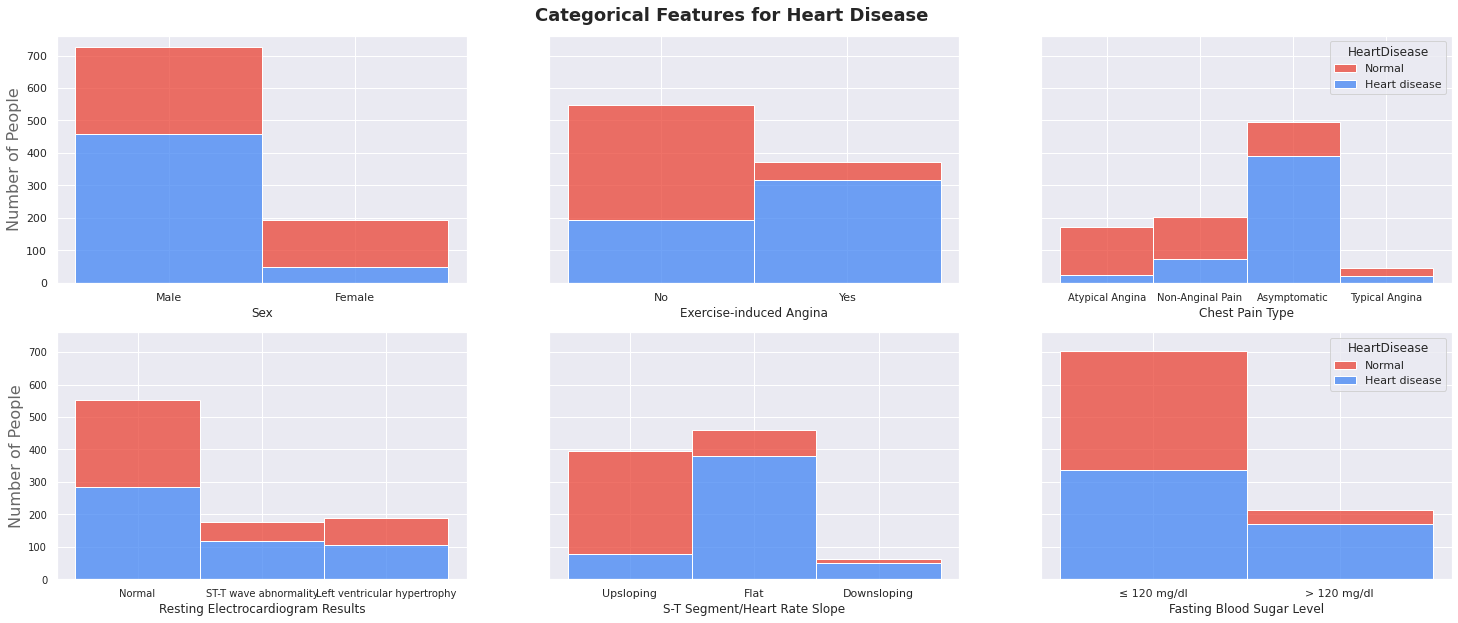

In [15]:
f, axs = plt.subplots(2, 3, sharey=True, figsize=(25, 10))

f.suptitle('Categorical Features for Heart Disease', fontsize=18, fontweight='bold',y=0.92)

#1
sns.histplot(data=df_copy, x='Sex', hue='HeartDisease', stat='count', multiple="stack",palette=['#ea4335', '#4285f4'],ax=axs[0,0])
axs[0,0].legend([],[], frameon=False)
axs[0,0].set_ylabel("Number of People",size = 16,alpha=0.7)

#2
sns.histplot(data=df_copy, x='ExerciseAngina', hue='HeartDisease', stat='count', multiple="stack",palette=['#ea4335', '#4285f4'],ax=axs[0,1])
axs[0,1].set(xlabel='Exercise-induced Angina')
axs[0,1].legend([],[], frameon=False)

#3
sns.histplot(data=df_copy, x='ChestPainType', hue='HeartDisease', stat='count', multiple="stack",palette=['#ea4335', '#4285f4'],ax=axs[0,2])
axs[0,2].tick_params(labelsize=10)
#axs[1,0].legend([],[], frameon=False)
axs[0,2].set(xlabel='Chest Pain Type')

#4
sns.histplot(data=df_copy, x='RestingECG', hue='HeartDisease', stat='count', multiple="stack",palette=['#ea4335', '#4285f4'],ax=axs[1,0])
axs[1,0].tick_params(labelsize=10)
axs[1,0].legend([],[], frameon=False)
axs[1,0].set_xlabel('Resting Electrocardiogram Results')
axs[1,0].set_ylabel("Number of People",size = 16,alpha=0.7)

#5
sns.histplot(data=df_copy, x='ST_Slope', hue='HeartDisease', stat='count', multiple="stack",palette=['#ea4335', '#4285f4'],ax=axs[1,1])
axs[1,1].legend([],[], frameon=False)
axs[1,1].set(xlabel='S-T Segment/Heart Rate Slope')

#6
sns.histplot(data=df_copy, x='FastingBS', hue='HeartDisease', stat='count', multiple="stack",palette=['#ea4335', '#4285f4'],ax=axs[1,2])
axs[1,2].set_ylabel("")
axs[1,2].set(xlabel='Fasting Blood Sugar Level')

plt.rcParams.update({'font.size': 100})
#matplotlib.rcParams.update({'font.size': 22})
#f.update_layout(font=dict(size=12))
#f.layout.update(font=dict(size=12))


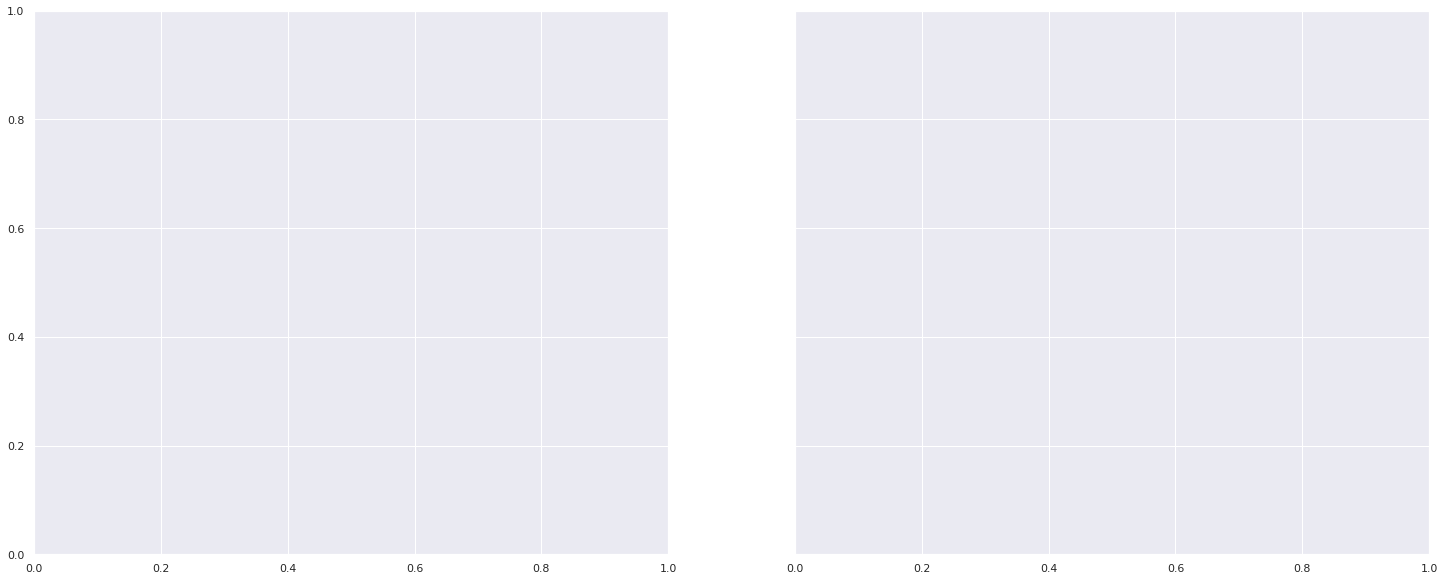

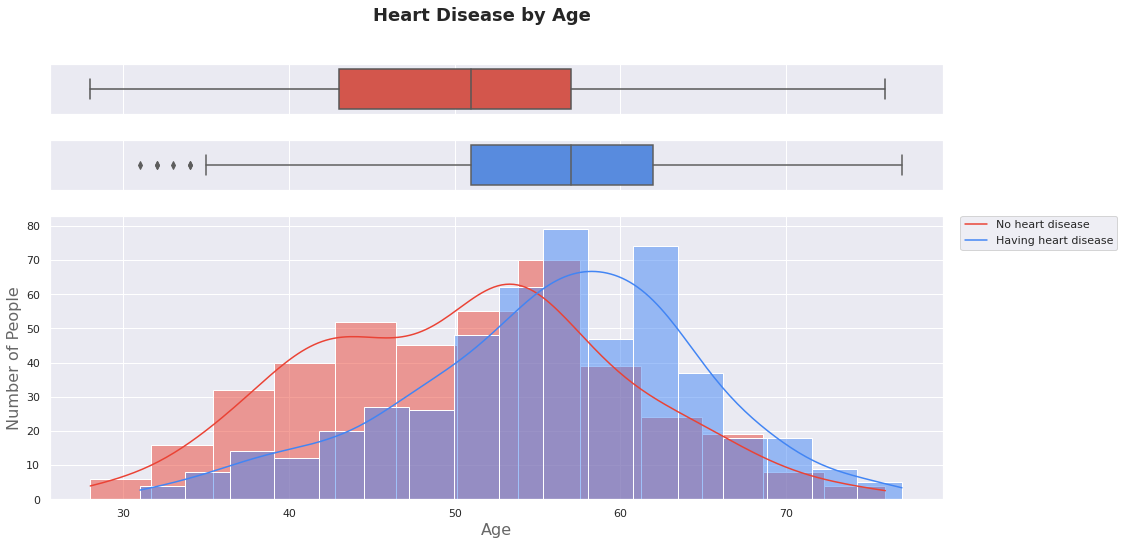

In [16]:

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Normal']["Age"], ax=ax_box1, color="#ea4335")
sns.histplot(df_copy[df_copy['HeartDisease']=='Normal'], x="Age", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Heart disease']["Age"], ax=ax_box2, color='#4285f4')
sns.histplot(df_copy[df_copy['HeartDisease']=='Heart disease'], x="Age", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

f.suptitle('Heart Disease by Age', fontsize=18, fontweight='bold')
ax_hist.set_xlabel("Age",size = 16,alpha=0.7)
ax_hist.set_ylabel("Number of People",size = 16,alpha=0.7)

plt.legend(title='', loc=2, labels=['No heart disease', 'Having heart disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

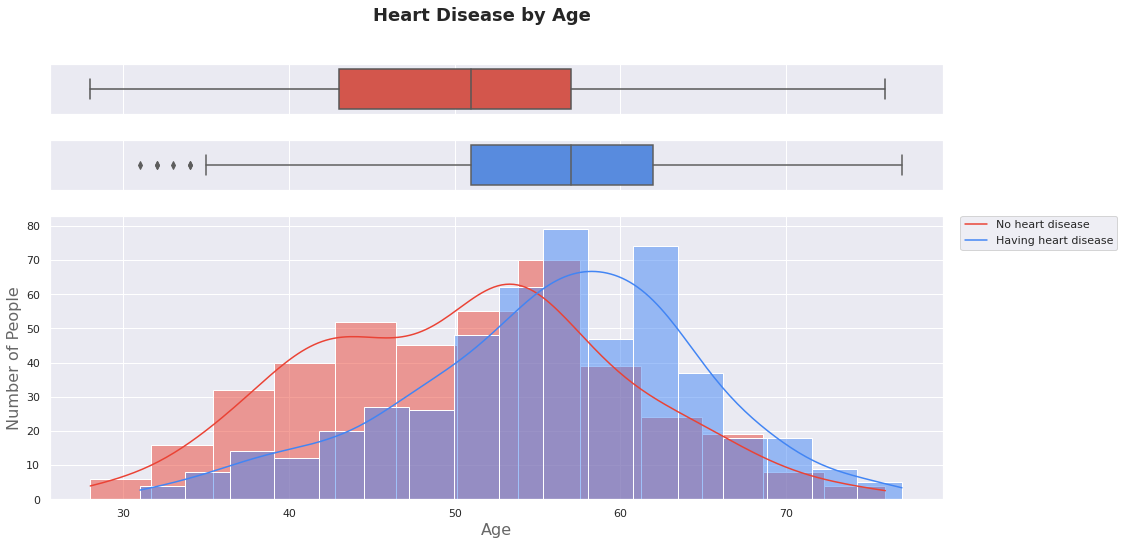

In [17]:

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Normal']["Age"], ax=ax_box1, color="#ea4335")
sns.histplot(df_copy[df_copy['HeartDisease']=='Normal'], x="Age", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Heart disease']["Age"], ax=ax_box2, color='#4285f4')
sns.histplot(df_copy[df_copy['HeartDisease']=='Heart disease'], x="Age", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

f.suptitle('Heart Disease by Age', fontsize=18, fontweight='bold')
ax_hist.set_xlabel("Age",size = 16,alpha=0.7)
ax_hist.set_ylabel("Number of People",size = 16,alpha=0.7)

plt.legend(title='', loc=2, labels=['No heart disease', 'Having heart disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

In [18]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

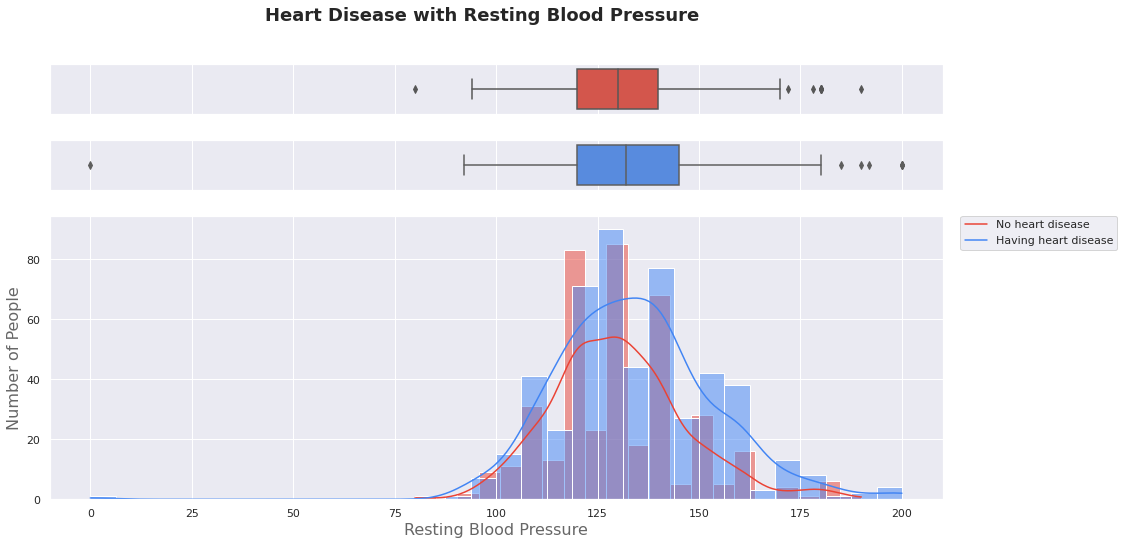

In [19]:

 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Normal']["RestingBP"], ax=ax_box1, color="#ea4335")
sns.histplot(df_copy[df_copy['HeartDisease']=='Normal'], x="RestingBP", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Heart disease']["RestingBP"], ax=ax_box2, color='#4285f4')
sns.histplot(df_copy[df_copy['HeartDisease']=='Heart disease'], x="RestingBP", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

f.suptitle('Heart Disease with Resting Blood Pressure', fontsize=18, fontweight='bold')
ax_hist.set_xlabel("Resting Blood Pressure",size = 16,alpha=0.7)
ax_hist.set_ylabel("Number of People",size = 16,alpha=0.7)

plt.legend(title='', loc=2, labels=['No heart disease', 'Having heart disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

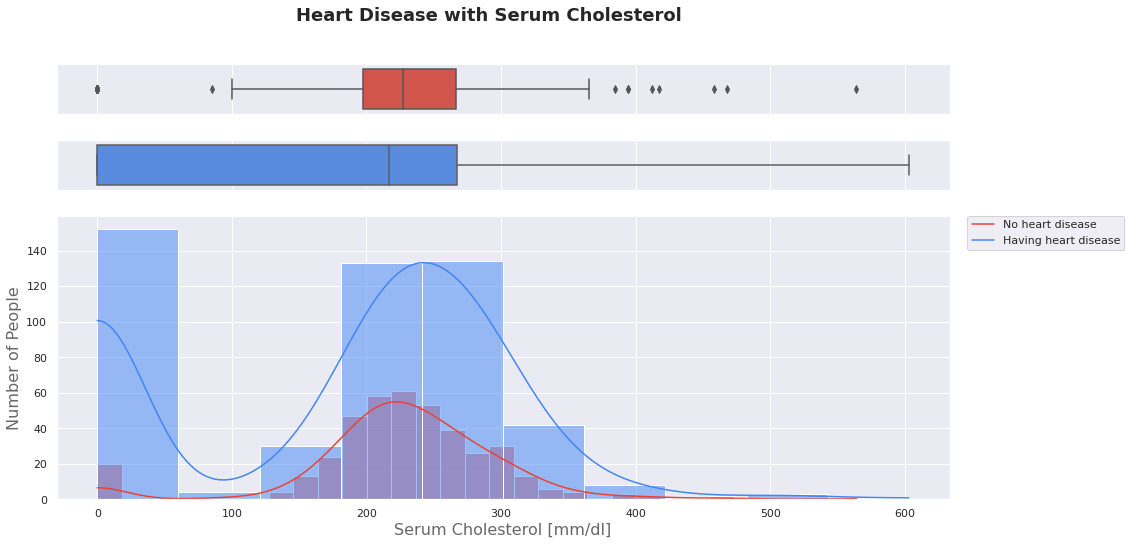

In [20]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Normal']["Cholesterol"], ax=ax_box1, color="#ea4335")
sns.histplot(df_copy[df_copy['HeartDisease']=='Normal'], x="Cholesterol", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Heart disease']["Cholesterol"], ax=ax_box2, color='#4285f4')
sns.histplot(df_copy[df_copy['HeartDisease']=='Heart disease'], x="Cholesterol", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

f.suptitle('Heart Disease with Serum Cholesterol', fontsize=18, fontweight='bold')
ax_hist.set_xlabel("Serum Cholesterol [mm/dl]",size = 16,alpha=0.7)
ax_hist.set_ylabel("Number of People",size = 16,alpha=0.7)

plt.legend(title='', loc=2, labels=['No heart disease', 'Having heart disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()


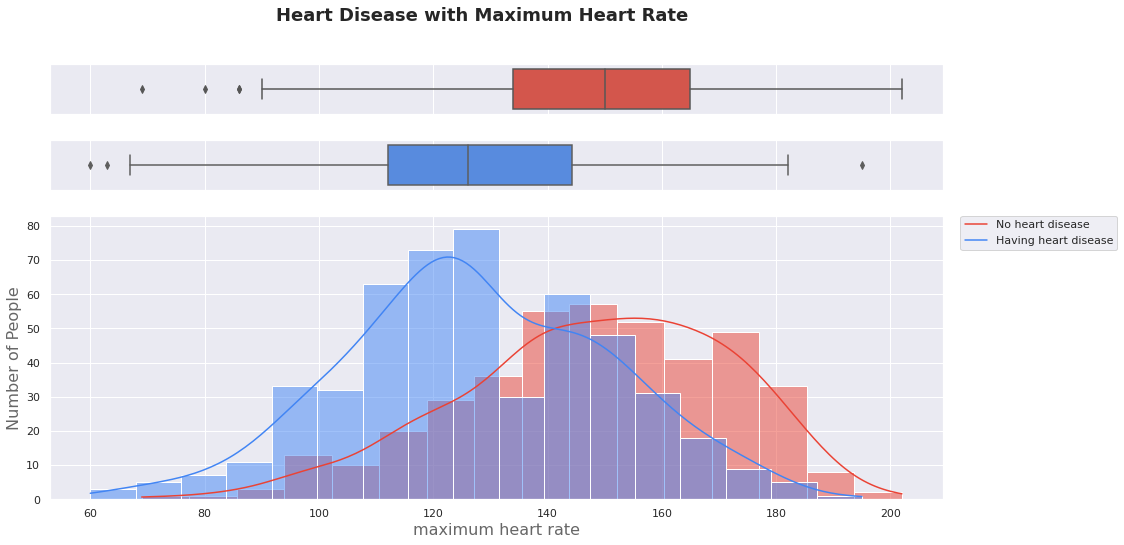

In [21]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Normal']["MaxHR"], ax=ax_box1, color="#ea4335")
sns.histplot(df_copy[df_copy['HeartDisease']=='Normal'], x="MaxHR", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Heart disease']["MaxHR"], ax=ax_box2, color='#4285f4')
sns.histplot(df_copy[df_copy['HeartDisease']=='Heart disease'], x="MaxHR", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

f.suptitle('Heart Disease with Maximum Heart Rate', fontsize=18, fontweight='bold')
ax_hist.set_xlabel("maximum heart rate",size = 16,alpha=0.7)
ax_hist.set_ylabel("Number of People",size = 16,alpha=0.7)

plt.legend(title='', loc=2, labels=['No heart disease', 'Having heart disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()


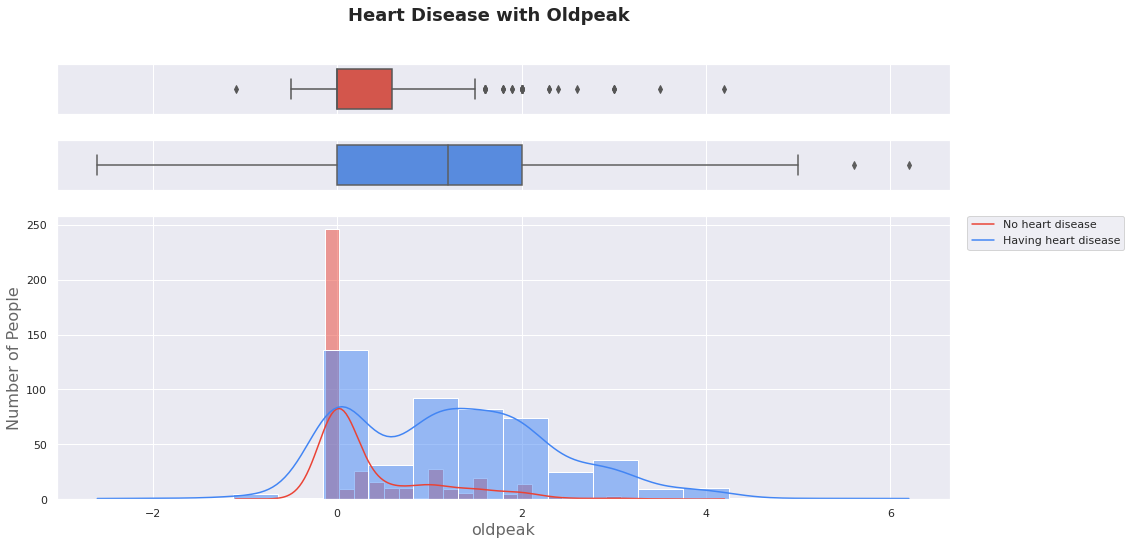

In [22]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Normal']["Oldpeak"], ax=ax_box1, color="#ea4335")
sns.histplot(df_copy[df_copy['HeartDisease']=='Normal'], x="Oldpeak", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_copy[df_copy['HeartDisease']=='Heart disease']["Oldpeak"], ax=ax_box2, color='#4285f4')
sns.histplot(df_copy[df_copy['HeartDisease']=='Heart disease'], x="Oldpeak", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

f.suptitle('Heart Disease with Oldpeak', fontsize=18, fontweight='bold')
ax_hist.set_xlabel("oldpeak",size = 16,alpha=0.7)
ax_hist.set_ylabel("Number of People",size = 16,alpha=0.7)

plt.legend(title='', loc=2, labels=['No heart disease', 'Having heart disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()


##3 Processing Data and Model

In [23]:
for col in [ 'Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR']:
    df[col] = df[col]/df[col].max()

In [24]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [25]:
for col in ['Sex', 'ChestPainType', 'HeartDisease', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], prefix = ['ChestPainType', 'RestingECG', 'ST_Slope'])

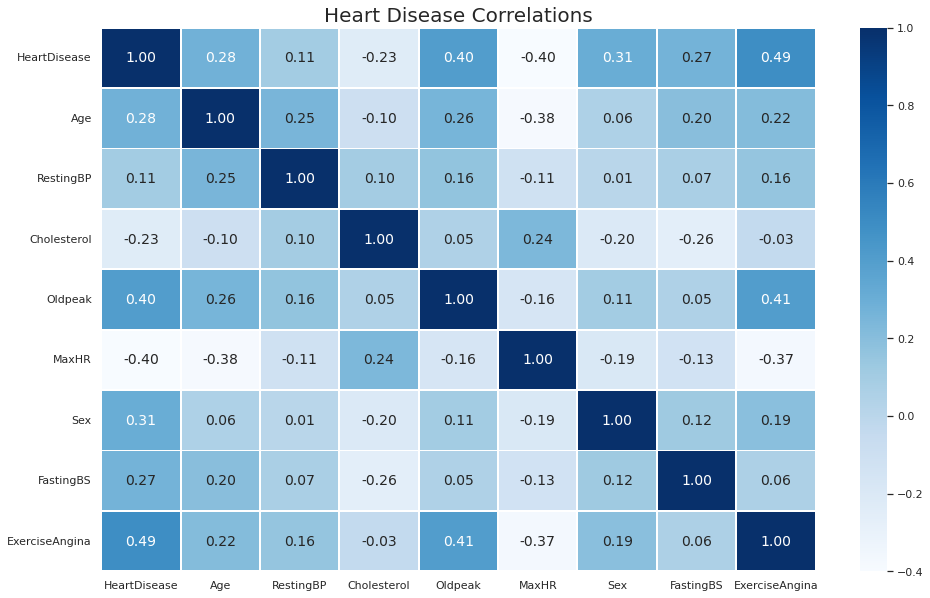

In [26]:
plt.figure(figsize = (16,10))
corr_heartdisease = df[['HeartDisease', 'Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR','Sex', 'FastingBS', 'ExerciseAngina']].corr()
sns.heatmap(corr_heartdisease, annot = True, cmap = 'Blues',fmt=".2f",annot_kws={'size':14,'weight':'normal'},linewidths=1)
plt.title("Heart Disease Correlations", fontsize = 20)
plt.show()

In [27]:
train_df = df[:int(len(df)*0.8)]
val_df = df[int(len(df)*0.8):]
print('\nData in Train:')
print(train_df['HeartDisease'].value_counts())

print('\nData in Val:')
print(val_df['HeartDisease'].value_counts())


Data in Train:
1    422
0    312
Name: HeartDisease, dtype: int64

Data in Val:
0    98
1    86
Name: HeartDisease, dtype: int64


In [28]:
class_0 = train_df[train_df['HeartDisease'] == 0]
class_1 = train_df[train_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0    312
1    312
Name: HeartDisease, dtype: int64


In [29]:
class_0 = val_df[val_df['HeartDisease'] == 0]
class_1 = val_df[val_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
val_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(val_df['HeartDisease'].value_counts())

Data in Test:
0    98
1    98
Name: HeartDisease, dtype: int64


In [30]:
x_train = np.array(train_df[['Age',	'Sex', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR',	'ExerciseAngina',	'Oldpeak', 'HeartDisease', 'ChestPainType_0',	'ChestPainType_1',	'ChestPainType_2',	'ChestPainType_3',	'RestingECG_0',	'RestingECG_1',	'RestingECG_2',	'ST_Slope_0',	'ST_Slope_1',	'ST_Slope_2']])
y_train = np.array(train_df['HeartDisease'])

x_val = np.array(val_df[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_0', 'ChestPainType_1', 'ChestPainType_2',	'ChestPainType_3', 'RestingECG_0', 'RestingECG_1', 'RestingECG_2', 'ST_Slope_0', 'ST_Slope_1', 'ST_Slope_2']])
y_val = np.array(val_df['HeartDisease'])

In [31]:
knc = KNeighborsClassifier().fit(x_train, y_train)
dtc = DecisionTreeClassifier().fit(x_train, y_train)
rfc = RandomForestClassifier().fit(x_train, y_train)

y_pred1 = knc.predict(x_val)
y_pred2 = dtc.predict(x_val)
y_pred3 = rfc.predict(x_val)

print(classification_report(y_val,y_pred1))
print(classification_report(y_val,y_pred2))
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        98
           1       0.94      0.94      0.94        98

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        98

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        98

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



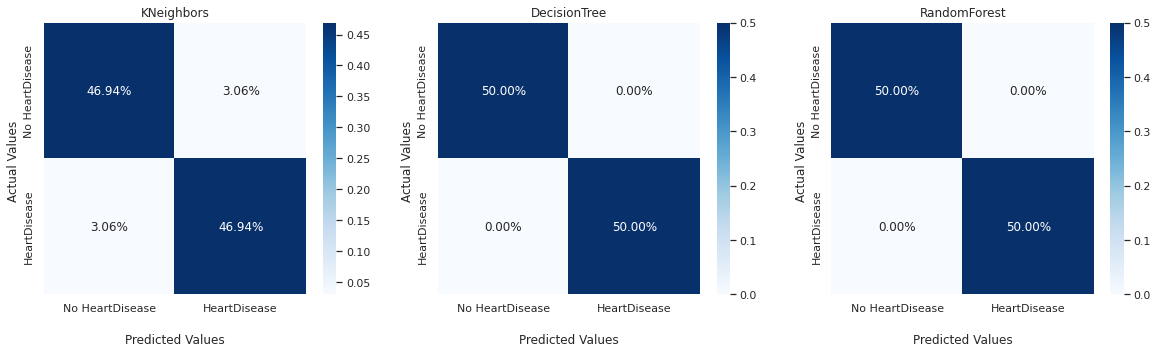

In [32]:
cm1 = confusion_matrix(y_val, y_pred1)
cm2 = confusion_matrix(y_val, y_pred2)
cm3 = confusion_matrix(y_val, y_pred3)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

sns.heatmap(cm1/np.sum(cm1),fmt='.2%', annot=True, cmap='Blues', ax=ax1)
sns.heatmap(cm2/np.sum(cm2),fmt='.2%', annot=True, cmap='Blues', ax=ax2)
sns.heatmap(cm3/np.sum(cm3),fmt='.2%', annot=True, cmap='Blues', ax=ax3)

ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');
ax3.set_xlabel('\nPredicted Values')
ax3.set_ylabel('Actual Values ');

ax1.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax1.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax2.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax2.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax3.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax3.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

ax1.set_title('KNeighbors')
ax2.set_title('DecisionTree')
ax3.set_title('RandomForest')


plt.show()